# 2.9 Filtering Data

#### Introduction
Filtering is an essential technique in time series analysis, especially in geosciences, where signals are often contaminated by noise or contain both short- and long-duration components. Filters help isolate meaningful information from raw data by attenuating unwanted frequencies or enhancing certain features. In this lecture, we will explore how to filter time series data, with a focus on a climate variable that has seasonality and a positive trend. Climate data often exhibits both short-term variations (such as daily or seasonal cycles) and long-term trends (such as oceanic warming). By applying filters, we can focus on specific components of a climate-related signal, whether we are interested in long-term climate trends or short-term weather patterns.

#### Why Filtering is Important
- **Noise Reduction**: Geophysical data often contain noise from measurement instruments, environmental conditions, or unrelated signals. Filtering helps remove this noise and enhances the signal of interest.
- **Feature Isolation**: By focusing on specific frequency bands, filtering allows us to isolate short-term phenomena (like storms) or long-term processes (like climate trends).
- **Smoothing Data**: In geosciences, smoothing noisy time series data is critical for making patterns more apparent and improving the clarity of visualizations.
- **Detecting Trends**: Long-term filtering can reveal underlying trends in the data, which is vital for studies related to climate change, ocean circulation, and global warming.

#### Types of Filters
- **Low-Pass Filter**: Allows low-frequency components to pass through while attenuating high-frequency components. Useful for isolating long-term trends.
- **High-Pass Filter**: Allows high-frequency components to pass through while attenuating low-frequency components. Useful for focusing on short-term fluctuations.
- **Band-Pass Filter**: Allows a specific range of frequencies to pass through, blocking both higher and lower frequencies. Useful for analyzing phenomena within a particular frequency range.
- **Smoothing Filters**: Such as moving averages or Gaussian filters, smooth the data to remove short-term fluctuations.

The data may superimpose multiple signals of various frequencies. To remove or extract specific signals that do not overlap in frequencies, we can *filter* the data. 

The filter can be:
* **high pass**: reduce signals at frequencies *lower* than a corner frequency $f_c$, only let the signals *above* $f_c$. Often parameterized in functions as ``hp`` or ``highpass``.
* **low pass**: reduce signals at frequencies *greater* than a cutoff frequency $f_c$, only let the signals *below* that $f_c$. Often parameterized in functions as ``lp`` or ``lowpass``.
* **band pass**: reduce signals at frequencies *lower* than a low corner frequency $f_{c1}$ and at frequencies *greater* than a high corner frequency $f_{c2}>f_{c1}$. Often parameterized as ``bp`` or ``bandpass``.


There exist different types of filters, the most common are ``butterworth`` and ``chebyshev``, but there exist others.

![Filters](../img/filters.png)

**Figure**: Examples of filters illustrated [here](!https://www.ni.com/docs/en-US/bundle/labview/page/lvanlsconcepts/lvac_iir_filter_types.html).


#### Python Example: Filtering Sea Surface Temperature Data

Below is a Python example demonstrating how to filter SST data using a low-pass filter to focus on long-term trends and a high-pass filter to isolate short-term fluctuations.


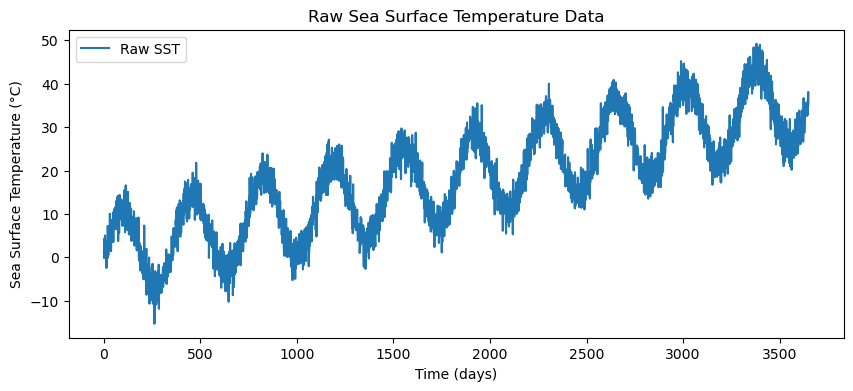

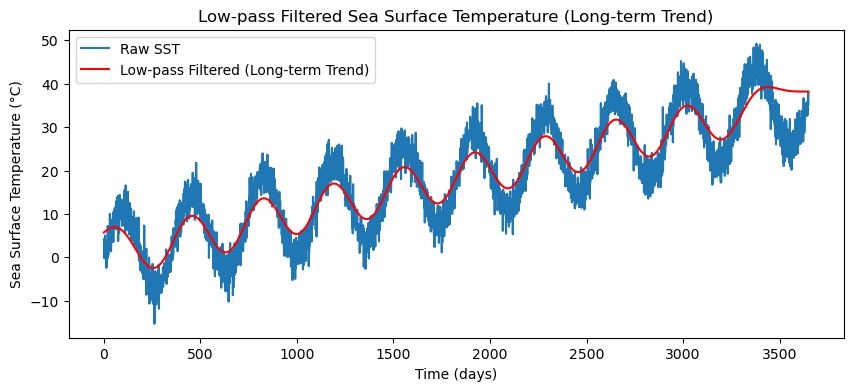

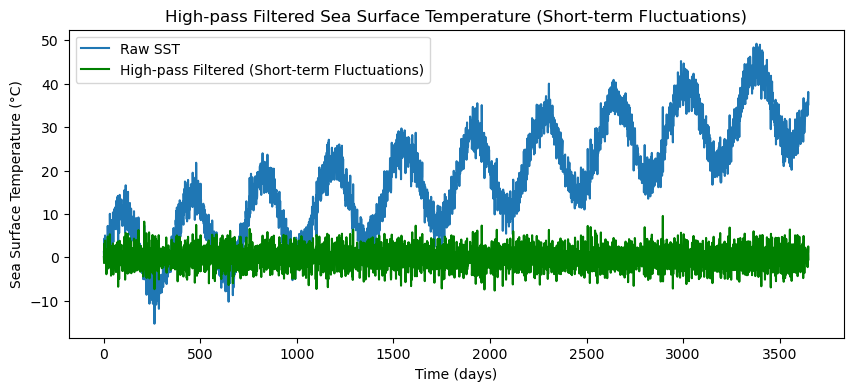

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

# Example: Sea surface temperature time series (synthetic data for simplicity)
# Generate a synthetic climate time series with a trend, seasonal cycle, and noise
np.random.seed(42)

time = np.arange(0, 365 * 10, 1)  # 10 years of daily data
trend = 0.01 * time  # Long-term warming trend
seasonal = 10 * np.sin(2 * np.pi * time / 365)  # Seasonal cycle
noise = np.random.normal(0, 0.5, len(time))  # Random noise

clima = trend + seasonal + 5*noise

# Plot the raw data
plt.figure(figsize=(10, 4))
plt.plot(time, clima, label='Raw Data')
plt.xlabel('Time (days)')
plt.ylabel('Time Series (°C)')
plt.title('Climate Time Series Data')
plt.legend()
plt.show()

# Low-pass filter to isolate long-term trend
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply low-pass filter
cutoff = 1 / 365  # Cutoff frequency (1 cycle per year, isolating long-term trend)
fs = 1  # Sampling frequency (1 sample per day)
b, a = butter_lowpass(cutoff, fs)
clima_lowpass = filtfilt(b, a, clima)

# Plot the filtered data (long-term trend)
plt.figure(figsize=(10, 4))
plt.plot(time, clima, label='Raw Clima')
plt.plot(time, clima_lowpass, label='Low-pass Filtered (Long-term Trend)', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Clima (°C)')
plt.title('Low-pass Filtered Climate Data (Long-term Trend)')
plt.legend()
plt.show()

# High-pass filter to isolate short-term fluctuations
def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Apply high-pass filter
cutoff = 1 / 30  # Cutoff frequency (1 cycle per month, isolating short-term variations)
b, a = butter_highpass(cutoff, fs)
clima_highpass = filtfilt(b, a, clima)

# Plot the filtered data (short-term fluctuations)
plt.figure(figsize=(10, 4))
plt.plot(time, clima, label='Raw SST')
plt.plot(time, clima_highpass, label='High-pass Filtered (Short-term Fluctuations)', color='green')
plt.xlabel('Time (days)')
plt.ylabel('Climate Data (°C)')
plt.title('High-pass Filtered Climate Data (Short-term Fluctuations)')
plt.legend()
plt.show()

#### Advantages of Filtering CLimate Data:
- **Long-Term Climate Analysis**: A low-pass filter isolates long-term trends, such as global warming, making it easier to quantify the rate of temperature increase.
- **Seasonal and Short-Term Variability**: High-pass filters isolate short-term changes, which are crucial for studying seasonal cycles or local events like storms and oceanic oscillations.
- **Data Smoothing**: Filters help smooth noisy data, making it easier to identify underlying patterns, which is important for both analysis and visualization.

#### Conclusion
Filtering time series data is a crucial step in geoscientific analysis, helping to isolate specific features, remove noise, and detect underlying trends. Whether you're studying long-term climate change or short-term weather phenomena, applying filters to sea surface temperature (SST) data provides valuable insights into both local and global processes. By using Python libraries like `scipy` and `matplotlib`, geoscientists can effectively apply filters to their data and make more informed interpretations.

#### Use Cases in Geoscience:
- **Climate Change Studies**: Filtering SST data to remove noise and focus on long-term trends is essential for understanding the effects of climate change.
- **El Niño and La Niña Detection**: Filtering helps identify periodic oscillations in SST data, making it easier to detect large-scale phenomena like El Niño and La Niña.
- **Weather Forecasting**: Short-term variations in SST can affect local weather patterns, and high-pass filters help isolate these short-term signals for analysis.

### Example 2: Application to seismology


In [4]:
!pip install obspy


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# Import modules for seismic data and feature extraction

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.signal as signal


# seismic python toolbox
import obspy
import obspy.clients.fdsn.client as fdsn
from obspy import UTCDateTime 



We will first download data. The seismic data from Puget Sound for a large M8.2 earthquake that happened in Alaska, July 29, 2021.

In [5]:
# Download seismic data
network = 'UW'
station = 'RATT'
channel = 'HHZ'# this channel gives a low frequency, 1Hz signal.
Tstart = UTCDateTime(2021,7,29,6,15)
Tend = Tstart+7200# UTCDateTime(year=2022, month=10, day=8)
fdsn_client = fdsn.Client('IRIS') # client to query the IRIS DMC server

# call to download the specific data: earthquake waveforms
Z = fdsn_client.get_waveforms(network=network, station=station, location='--', channel=channel, starttime=Tstart, \
    endtime=Tend, attach_response=True)
# basic pre-processing: merge all data if there is gaps, detrend, taper,
#  remove the seismic instrumental response to go from the digitizer units to ground motion (velocity) units.
Z.merge(); Z.detrend(type='linear'); Z[0].taper(max_percentage=0.05)


# call to download the specific data: noise waveforms
N = fdsn_client.get_waveforms(network=network, station=station, location='--', channel=channel, starttime=Tstart-7200, \
    endtime=Tstart, attach_response=True)
# basic pre-processing: merge all data if there is gaps, detrend, taper,
#  remove the seismic instrumental response to go from the digitizer units to ground motion (velocity) units.
N.merge(); N.detrend(type='linear');N[0].taper(max_percentage=0.05)

UW.RATT..HHZ | 2021-07-29T04:15:00.000000Z - 2021-07-29T06:14:59.990000Z | 100.0 Hz, 720000 samples

Text(0, 0.5, 'Counts')

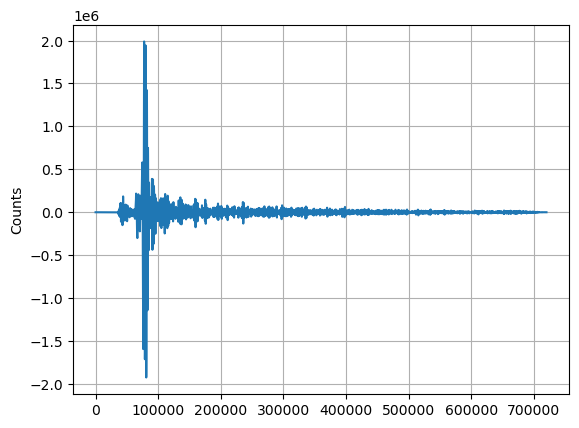

In [8]:
plt.plot(Z[0].data);plt.grid(True);plt.ylabel('Counts')



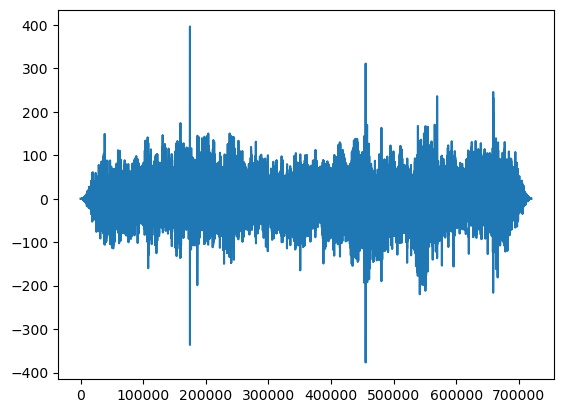

In [9]:
plt.plot(N[0].data);


We will use the ``scipy.signal`` module to filter the time series. First we remove the unrealistic signals past 150 s.

In [11]:
# sampling rate of the data:
fs = Z[0].stats.sampling_rate
z=np.asarray(Z[0].data)
n=np.asarray(N[0].data)

We use here a [*butterworth*](!https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) filter of second order between 1s and 150s. The ``sos`` filter is a *second-order sections*, which are the product of second-order polynomials to represent the original filters. They are more complex but more stable.

In [24]:
sos = signal.butter(2,[1,10], 'bp', fs=fs, output='sos')
zf = signal.sosfilt(sos, z)
nf = signal.sosfilt(sos, n)
t=np.arange(0.,7200.,1./fs)

Text(0.5, 0, 'Time in seconds')

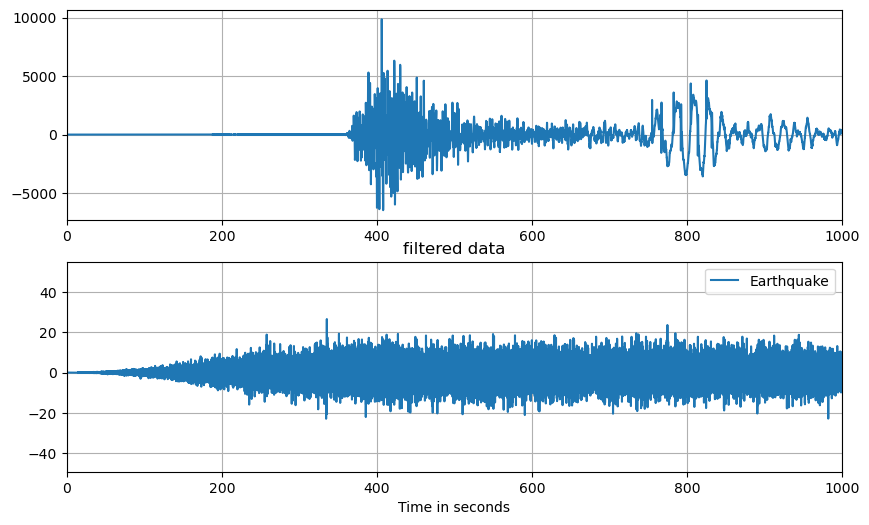

In [25]:
fig,axis = plt.subplots(2,1,figsize=(10,6))
axis[0].plot(t,zf[:-1]);
axis[1].plot(t,nf);
axis[0].set_xlim([0,1000])
axis[1].set_xlim([0,1000])
axis[0].grid(True);axis[1].grid(True)
plt.title('filtered data');plt.legend(['Earthquake','noise'])
plt.xlabel('Time in seconds')

Now filter at high frequencies (>10Hz) and compare earthquakes and noise signals. 

(700.0, 1000.0)

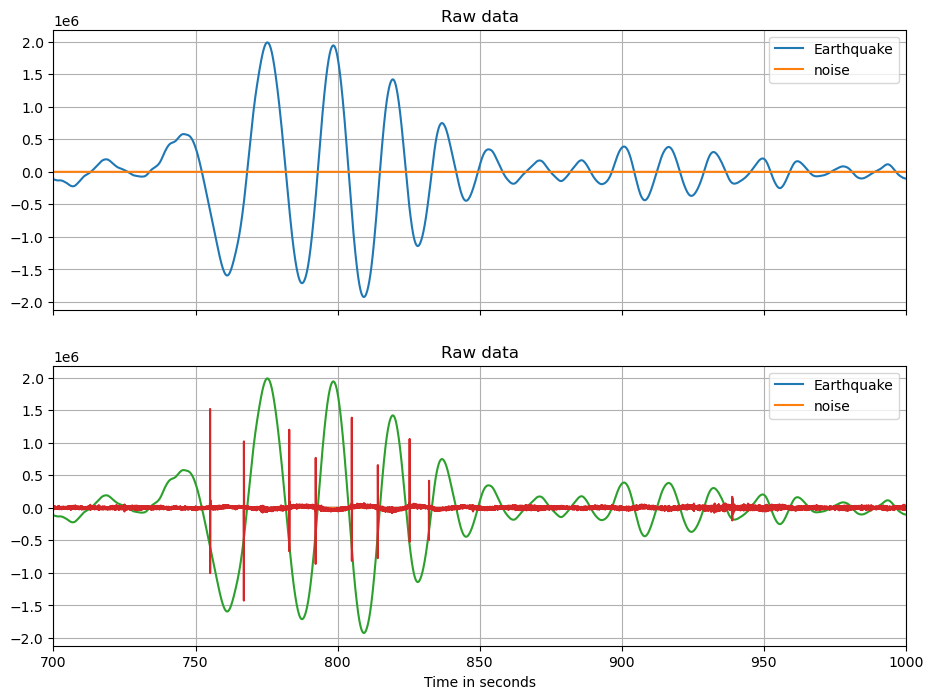

In [26]:
# enter below

sos = signal.butter(2,[10,40.], 'bp', fs=fs, output='sos')
zf = signal.sosfilt(sos, z)
nf = signal.sosfilt(sos, n)
t=np.arange(0.,7200.,1./fs)

fig,ax=plt.subplots(2,1,figsize=(11,8),sharex=True)
ax[0].plot(t,z[:-1]);ax[0].plot(t,n);ax[0].grid(True)
ax[0].set_title('Raw data');ax[0].legend(['Earthquake','noise'])
ax[1].plot(t,zf[:-1]);ax[1].plot(t,nf);ax[1].grid(True)
ax[1].set_title('filtered data');ax[1].legend(['Earthquake','noise'])
ax[1].set_xlabel('Time in seconds')
ax[0].set_xlim([700,1000])
ax[1].set_xlim([700,1000])


plt.plot(t,z[:-1]);plt.grid(True)
plt.title('Raw data');plt.legend(['Earthquake','noise'])
plt.plot(t,zf[:-1]*1000)
plt.xlabel('Time in seconds')
plt.xlim([700,1000])

(754.0, 756.0)

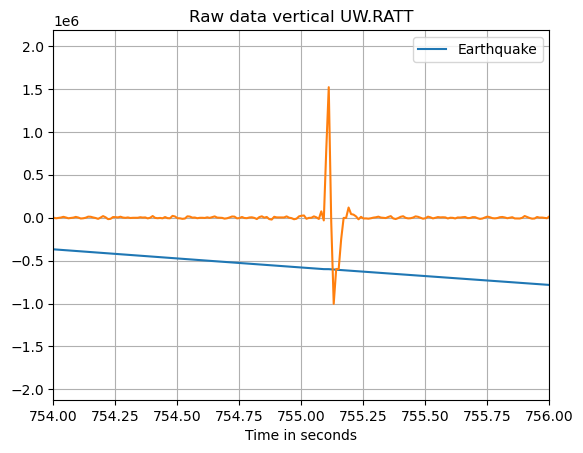

In [9]:


plt.plot(t,z[:-1]);plt.grid(True)
plt.title('Raw data vertical UW.RATT');plt.legend(['Earthquake','noise'])
plt.plot(t,zf[:-1]*1000)
plt.xlabel('Time in seconds')
plt.xlim([754,756])